In [1]:
import os
import cv2
import warnings
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from sift import *
warnings.filterwarnings("ignore")

In [2]:
file_paths = []
for root, _, fs in os.walk("./corel/"):
    for f in fs:
        file_paths.append(os.path.join(root, f))

In [3]:
features = {}  # 特征
for file_path in file_paths:
    img = cv2.imread(file_path)  # 读第一张图片
    if len(img.shape) == 3:  # 如果是彩色图，就按照三通道取均值的方式转成灰度图
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        img = img
    keyPoints, discriptors = SIFT(img, showDoGimgs=False)
    features[file_path.split("/")[-1].split(".")[0]] = discriptors
    print("finish: "+file_path)
pkl.dump(features, open("features.pkl", "wb"))

KeyboardInterrupt: 

In [4]:
import pickle as pkl
features = pkl.load(open("features.pkl", "rb"))

构造描述符矩阵...
Finish: 100/999
Finish: 200/999
Finish: 300/999
Finish: 400/999
Finish: 500/999
Finish: 600/999
Finish: 700/999
Finish: 800/999
Finish: 900/999
Finish: 1000/999
进行KMeans聚类...
聚类完成...
获取所有图片表征向量...
图片检索...


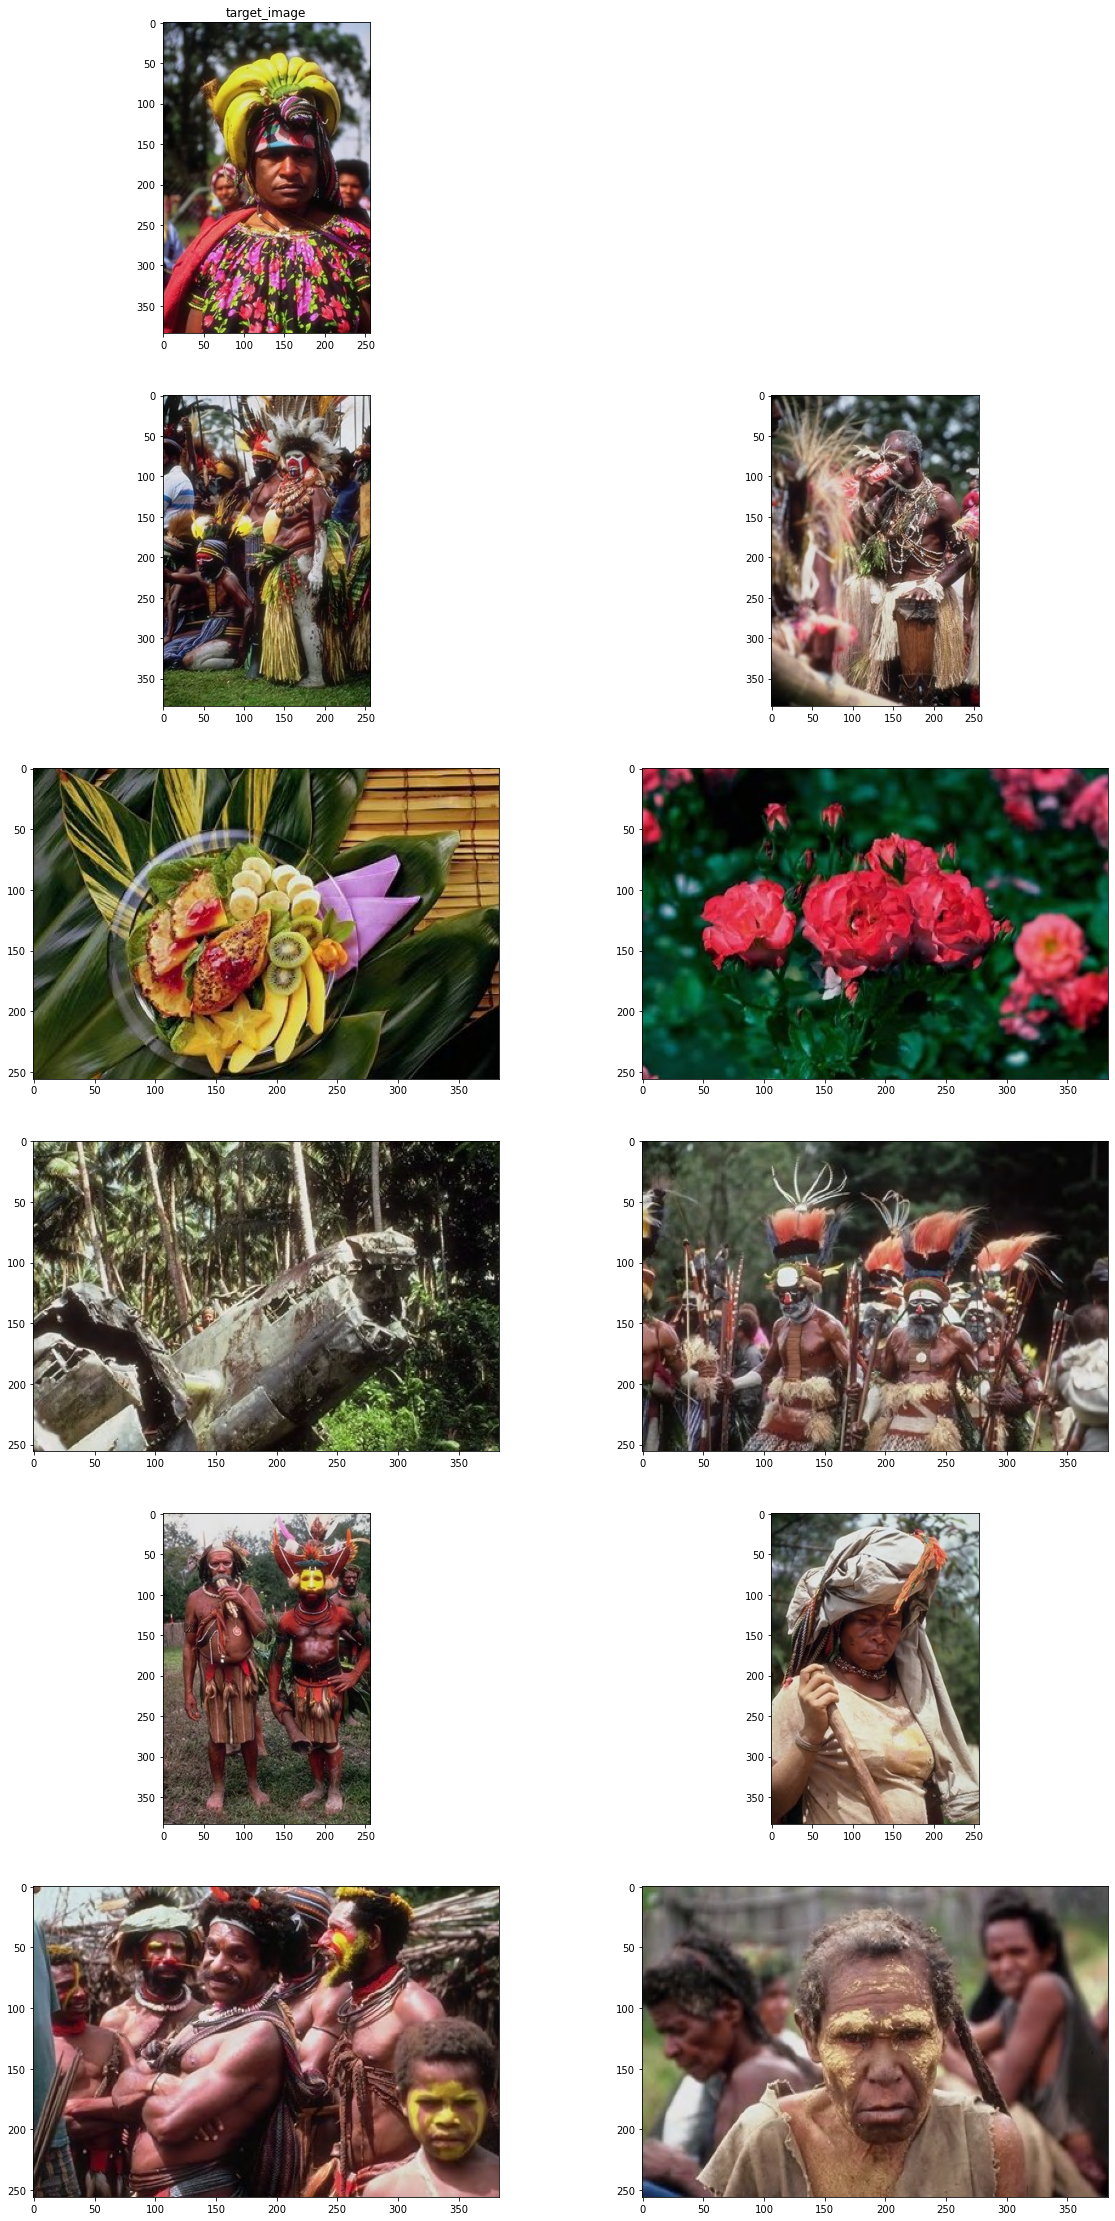

In [8]:
target_path = "./corel/0/76.jpg"
Image_Retrieval(target_path, features, file_paths, num_words=150)